In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import learning_curve

In [2]:
#pip install openpyxl


In [3]:
df = pd.read_excel('Opta.xls')

In [4]:
df = pd.DataFrame(df)



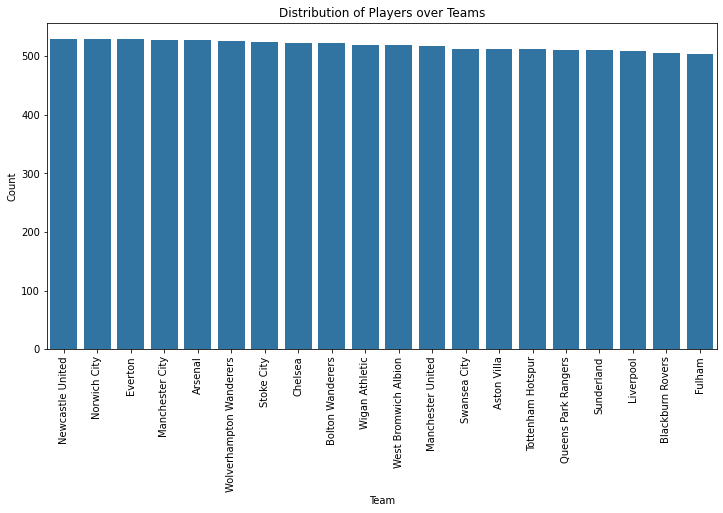

In [5]:

# Create a bar plot of the team distribution
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='Team', order=df['Team'].value_counts().index)
plt.title('Distribution of Players over Teams')
plt.xlabel('Team')
plt.ylabel('Count')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.show()


In [6]:
## Only player forename has missing values

In [7]:
missing_values = df.isnull().sum()
columns_missing = missing_values[missing_values > 0]

In [8]:
## Check which player names have a missing Player Forename
### rows_missing shows all the context for the missing player names of 'unique_missing'

In [9]:
rows_missing = df[df['Player Forename'].isnull()]
selected_clumns = ['Player ID', 'Player Surname', 'Player Forename', 'Team']
rows_missing = rows_missing[selected_clumns]
unique_missing = rows_missing['Player Surname'].unique().tolist()

In [10]:

# Filter rows with missing values in the 'Player Forename' column and unique Player Surnames
rows_to_transform = df[df['Player Forename'].isnull() & df['Player Surname'].isin(unique_missing)]

# Define a function to split names based on the cases you mentioned
def split_name(full_name):
    if ' ' not in full_name:  # Single name
        return ('', full_name)
    else:
        parts = full_name.split(' ')
        if len(parts) == 2:  # Western name
            return (parts[0], parts[1])
        else:  # Asian name
            return (parts[1], parts[0])  # Swap the positions for Asian names

# Apply the split_name function and create two new columns
split_names = rows_to_transform['Player Surname'].apply(split_name).apply(pd.Series)
split_names.columns = ['Player Forename', 'Player Surname']

# Update df with the modified rows
df.update(split_names)




In [11]:

# List of the Asian names that were swapped
specific_names = ['Ji Dong-Won', 'Lee Chung-Yong', 'Park Chu-Young', 'Park Ji-Sung']

# Iterate through the DataFrame and swap values for the specific names
for name in specific_names:
    surname, forename = name.split()
    df.loc[df['Player Surname'] == forename, 'Player Surname'], df.loc[df['Player Forename'] == surname, 'Player Forename'] = surname, forename







In [12]:
selected_columns = [
    'Player ID', 'Player Surname', 'Player Forename', 'Team', 'Position Id',
    'Time Played', 'Goals', 'Goals as a substitute', 'First Goal', 'Winning Goal',
    'Shots On Target inc goals', 'Shots Off Target inc woodwork', 'Blocked Shots',
    'Goals from Inside Box', 'Shots On from Inside Box', 'Shots Off from Inside Box',
    'Blocked Shots from Inside Box', 'Goals Open Play', 'Attempts Open Play on target',
    'Attempts Open Play off target', 'Goals from Corners', 'Attempts from Corners on target',
    'Attempts from Corners off target', 'Goals from Throws', 'Attempts from Throws on target',
    'Attempts from Throws off target', 'Goals from Set Play', 'Attempts from Set Play on target',
    'Attempts from Set Play off target', 'Goals from penalties', 'Attempts from Penalties on target',
    'Attempts from Penalties off target', 'Left Foot Goals', 'Left Foot Shots On Target',
    'Left Foot Shots Off Target', 'Left Foot Blocked Shots', 'Right Foot Goals',
    'Right Foot Shots On Target', 'Right Foot Shots Off Target', 'Right Foot Blocked Shots',
    'Other Goals', 'Other Shots On Target', 'Other Shots Off Target', 'Other Blocked Shots',
    'Shots Cleared off Line Inside Area', 'Shots Cleared off Line Outside Area',
    'Goals from Outside Box', 'Shots On Target Outside Box', 'Shots Off Target Outside Box',
    'Blocked Shots Outside Box', 'Headed Goals', 'Headed Shots On Target',
    'Headed Shots Off Target', 'Headed Blocked Shots', 'Penalties Taken', 'Penalty Goals',
    'Penalties Saved', 'Penalties Off Target', 'Penalties Not Scored', 'Direct Free-kick Goals',
    'Direct Free-kick On Target', 'Direct Free-kick Off Target', 'Blocked Direct Free-kick',
    'Goals from Direct Free Kick', 'Attempts from Direct Free Kick on target',
    'Attempts from Direct Free Kick off target'
]

# Subset the DataFrame
subset_df = df[selected_columns]



In [13]:
goal_columns = [
    'Player ID', 'Player Surname', 'Player Forename', 'Team', 'Position Id',
    'Time Played', 'Goals', 'Goals as a substitute', 'First Goal', 'Winning Goal',
    'Shots On Target inc goals', 'Goals from Inside Box', 'Goals Open Play','Goals from Corners', 
    'Goals from Throws','Goals from Set Play', 'Attempts from Set Play on target',
    'Goals from penalties', 'Left Foot Goals', 'Right Foot Goals', 'Other Goals',
    'Goals from Outside Box', 'Headed Goals', 'Penalty Goals', 'Direct Free-kick Goals',
    'Goals from Direct Free Kick', 
]

goals_df = df[goal_columns]


In [14]:

# List of columns to exclude from summation
exclude_columns = [
    'Index', 'Date', 'Player ID', 'Player Surname', 'Player Forename', 'Team',
    'Team Id', 'Opposition', 'Opposition id', 'Venue', 'Position Id',
    'Team Formation', 'Position in Formation', 'CompId', 'SeasId'
]

# Identify columns to sum (exclude those in the exclude_columns list)
sum_columns = [col for col in df.columns if col not in exclude_columns]

# Group by Player ID and sum the data to get stats per player for the whole season
summarized_df = df.groupby(['Player ID', 'Player Forename', 'Player Surname'])[sum_columns].sum().reset_index()




In [15]:
column_list = list(summarized_df.columns)


In [16]:
# Load the second part of the data
ylabel = pd.read_excel('Transfermarkt.xlsx')

In [17]:
# Merge names in order to merge both datasets on the full player name
summarized_df['player_name'] = summarized_df['Player Forename'] + ' ' + summarized_df['Player Surname']

In [18]:
# Some names differ, this variable contains the players where the name differs between the 2 datasets
missing_names = pd.read_excel('Missing Players.xlsx')

In [19]:

# Merge the dataframes based on Player Forename and Player Surname
temp_df = pd.merge(summarized_df, missing_names, on=['Player Forename', 'Player Surname'], how='left', suffixes=('', '_missing'))

# Update player_name in summarized_df with values from 'ylabel name' in missing_names
summarized_df['player_name'] = temp_df['ylabel name'].combine_first(temp_df['player_name'])






In [20]:
# Merge summarized_df with ylabel

# Filter ylabel based on the condition season_start_year == 2011
filtered_ylabel = ylabel[ylabel['season_start_year'] == 2011]


# Merge the dataframes based on player_name and the filtered ylabel
merged_df = pd.merge(summarized_df, filtered_ylabel[['player_name', 'player_position', 'player_dob', 'player_nationality',
                                                     'player_height_mtrs', 'player_foot', 'player_market_value_euro']],
                     on='player_name', how='left')






In [21]:
check = merged_df.isnull().sum()

In [22]:
merged_df = merged_df.dropna(subset=['player_market_value_euro']).reset_index(drop=True)

In [23]:
check2 = merged_df.isnull().sum()
# There are only 11 players left where there height and favorite foot are missing

In [24]:
merged_df = merged_df.dropna(subset=['player_height_mtrs']).reset_index(drop=True)

In [25]:
# Only show the names of players with missing values in the specified columns
missing_values_df = merged_df.loc[merged_df[['player_position', 'player_dob', 'player_nationality',
                                              'player_height_mtrs', 'player_foot', 'player_market_value_euro']].isnull().any(axis=1),
                                  ['Player Forename', 'Player Surname', 'player_position', 'player_dob',
                                   'player_nationality', 'player_height_mtrs', 'player_foot', 'player_market_value_euro']]




In [26]:
## Adjust player position
merged_df.loc[merged_df['player_name'] == 'David Jones', 'player_position'] = 'Central Midfield'

In [27]:
## Transform Date of Birth to Age on the end of the 2011/2012 season to use it for plots
from datetime import datetime
merged_df['player_dob'] = pd.to_datetime(merged_df['player_dob'])

end_date = datetime(2012, 5, 13)

# Age on end_date
merged_df['age'] = merged_df['player_dob'].apply(lambda dob: (end_date - dob).days // 365)

In [28]:
# Create shots on target excl goals
merged_df['Shots on target excl goals'] = merged_df['Shots On Target inc goals'] - merged_df[ 'Goals']

In [29]:
## The dataset is now complete. Now its time to drop columns which we dont need

In [30]:
check = merged_df.isnull().sum()

In [31]:
# % of 0-values per column
zero_percentage = (merged_df.eq(0).mean() * 100).round(2)


# select columns with 100% 0-values. Other stats have many 0-values but might still be relevant
columns_0 = zero_percentage[zero_percentage == 100].index

# Drop the columns
merged_df.drop(columns=columns_0, inplace=True)

Structure & Summary

In [32]:
## 536 rows x 203 columns
merged_df.info

<bound method DataFrame.info of      Player ID Player Forename Player Surname  Appearances  Time Played  \
0            3            Ryan          Giggs           25         1466   
1          363            Paul        Scholes           17         1169   
2          973        Jonathan       Woodgate           17         1282   
3          999            Alan          Smith            2            5   
4         1059          Daniel       Gabbidon           17         1424   
..         ...             ...            ...          ...          ...   
531      97612           Sammy         Ameobi           10          192   
532      98769        Dong-Won             Ji           19          435   
533     103903            Adam         Henley            7          471   
534     105086           Kerim           Frei           16          673   
535     107853        Marcello         Trotta            1            2   

     Starts  Substitute On  Substitute Off  Goals  First Goal  ... 

Descriptive statistics

In [33]:
merged_df.describe

<bound method NDFrame.describe of      Player ID Player Forename Player Surname  Appearances  Time Played  \
0            3            Ryan          Giggs           25         1466   
1          363            Paul        Scholes           17         1169   
2          973        Jonathan       Woodgate           17         1282   
3          999            Alan          Smith            2            5   
4         1059          Daniel       Gabbidon           17         1424   
..         ...             ...            ...          ...          ...   
531      97612           Sammy         Ameobi           10          192   
532      98769        Dong-Won             Ji           19          435   
533     103903            Adam         Henley            7          471   
534     105086           Kerim           Frei           16          673   
535     107853        Marcello         Trotta            1            2   

     Starts  Substitute On  Substitute Off  Goals  First Goal  ..

Missing data

In [34]:
missing_data_check = merged_df.isnull().sum()
# No missing data

Univariate analysis

In [35]:
## 72 different nationalities
nationality_count = merged_df['player_nationality'].value_counts()
## Group these per continent due to the low frequency per country, only keep England separate. Central american countries will be put with south america due to low freq.
## Asia and Oceania will be merged into Other
continent_mapping = {'England' : 'England',
                     'Ireland': 'Europe',
                     'France': 'Europe',
                     'Scotland' : 'Europe',
                     'Wales' : 'Europe',
                     'Spain' : 'Europe',
                     'Argentina': 'South America',
                     'Netherlands' : 'Europe',
                     'Nigeria' : 'Africa',
                     'Belgium' : 'Europe',
                     'Senegal': 'Africa',
                     'United States' : 'North America',
                     'Northern Ireland' : 'Europe',
                     'Denmark' : 'Europe',
                     'Portugal' : 'Europe',
                     'Italy' : 'Europe',
                     'Russia' : 'Europe',
                     "Cote d'Ivoire" : 'Africa',
                     'Sweden' : 'Europe',
                     'Cameroon' : 'Africa',
                     'Croatia' : 'Europe',
                     'Ghana' : 'Africa',
                     'Czech Republic' : 'Europe',
                     'Iceland' : 'Europe',
                     'Australia' : 'Other',
                     'Chile' : 'South America',
                     'Serbia' : 'Europe',
                     'Hungary': 'Europe',
                     'Korea, South' : 'Other',
                     'Brazil' : 'South America',
                     'Jamaica' : 'Caribbean',
                     'Greece' : 'Europe',
                     'DR Congo' : 'Africa',
                     'Austria' : 'Europe',
                     'Switzerland' : 'Europe',
                     'Norway' : 'Europe',
                     'Germany' : 'Europe',
                     'Mali' : 'Africa',
                     'Barbados' : 'Caribbean',
                     'Uruguay' : 'South America',
                     'Mexico' : 'North America',
                     'Bosnia-Herzegovina' : 'Europe',
                     'Israel' : 'Other',
                     'Honduras' : 'North America',
                     'Morocco' : 'Africa',
                     'Montenegro' : 'Europe',
                     'Canada' : 'North America',
                     'South Africa' : 'Africa',
                     'French Guiana' : 'South America',
                     'Japan' : 'Other',
                     'Togo' : 'Africa',
                     'Slovenia' : 'Europe',
                     'Algeria' : 'Africa',
                     'Poland' : 'Europe',
                     'Finland' : 'Europe',
                     'Guyana' : 'South America',
                     'Gibraltar' : 'Europe',
                     'Grenada' : 'Caribbean',
                     'Paraguay' : 'South America',
                     'Colombia' : 'South America',
                     'Curacao' : 'Caribbean',
                     'Guadeloupe' : 'Caribbean',
                     'Egypt' : 'Africa',
                     'Costa Rica' : 'South America',
                     'Benin' : 'Africa',
                     'Oman' : 'Other',
                     'Romania' : 'Europe',
                     'Slovakia' : 'Europe',
                     'Ecuador' : 'South America',
                     'Congo' : 'Africa',
                     'Trinidad and Tobago' : 'Caribbean',
                     'Turkey' : 'Europe'
                     }

def country_to_continent(nationality):
    return continent_mapping.get(nationality, 'other')

merged_df['player_continent'] = merged_df['player_nationality'].apply(country_to_continent)


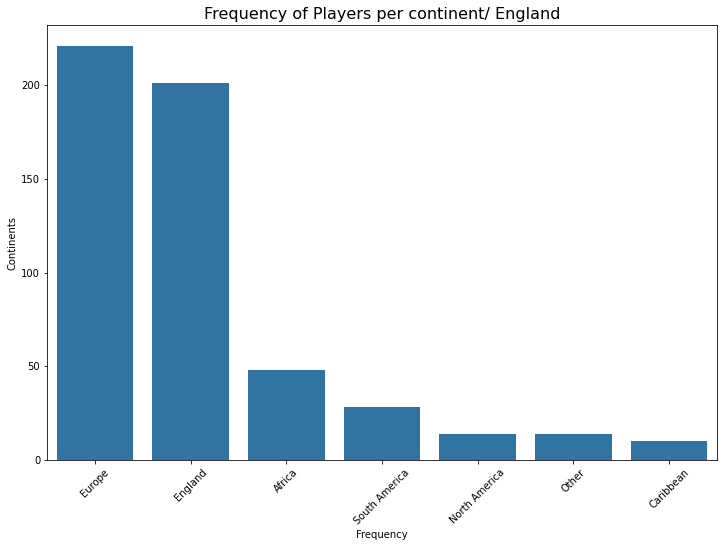

In [36]:
## Plot for player distribution per continent
continent_counts = merged_df['player_continent'].value_counts().reset_index()
continent_counts.columns = [ 'Continents', 'Frequency']
plt.figure(figsize=(12,8))
sns.barplot(x = 'Continents' , y = 'Frequency', data = continent_counts)
plt.title('Frequency of Players per continent/ England', fontsize=16)
plt.xlabel('Frequency')
plt.ylabel('Continents')
plt.xticks(rotation=45)
plt.show()

In [37]:
## Distribution of the player_positions
position_count = merged_df['player_position'].value_counts()

In [38]:
# Market value
min_value = merged_df[ 'player_market_value_euro'].min() #250K
max_value = merged_df[ 'player_market_value_euro'].max() #6.5M

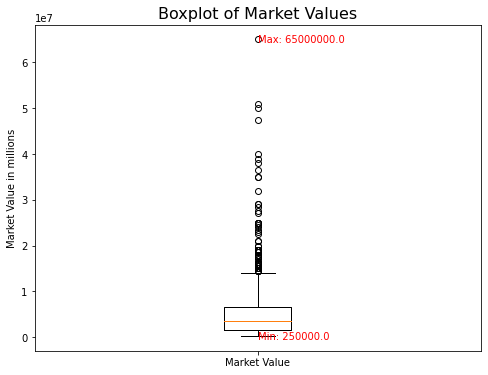

In [39]:
plt.figure(figsize=(8, 6))
plt.boxplot(merged_df['player_market_value_euro'])
plt.text(1, min_value, 'Min: ' + str(min_value), ha='left', va='center', color='red')
plt.text(1, max_value, 'Max: ' + str(max_value), ha='left', va='center', color='red')
plt.title('Boxplot of Market Values', fontsize = 16)
plt.ylabel('Market Value in millions')
plt.xticks([1], ['Market Value'])

plt.show()

We see that quite some players have a market value above the upper fence. We should log-transform the market value. After running test models we saw terrible results.

In [40]:
## We see that there are quite some players which fall above the 
## upper whisker of 1.5M                        

In [41]:
most_expensive_players = merged_df[merged_df['player_market_value_euro'] > 1500000].shape[0]
# 392 players with a value above the top whisker of the boxplot

In [42]:
top_10_expensive_players = merged_df.sort_values(by='player_market_value_euro', ascending=False).head(10)

# Selecting the relevant columns
top_10_expensive_players = top_10_expensive_players[['player_name', 'player_position', 'player_nationality', 'player_market_value_euro']]
## Top 10 mostly consists of attacking players; 1 CB, 2 CM and 7 attacking roles


C:\Users\damon\AppData\Local\Temp\ipykernel_31652\2703826769.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=position_count.index, y=position_count.values, palette = colors)


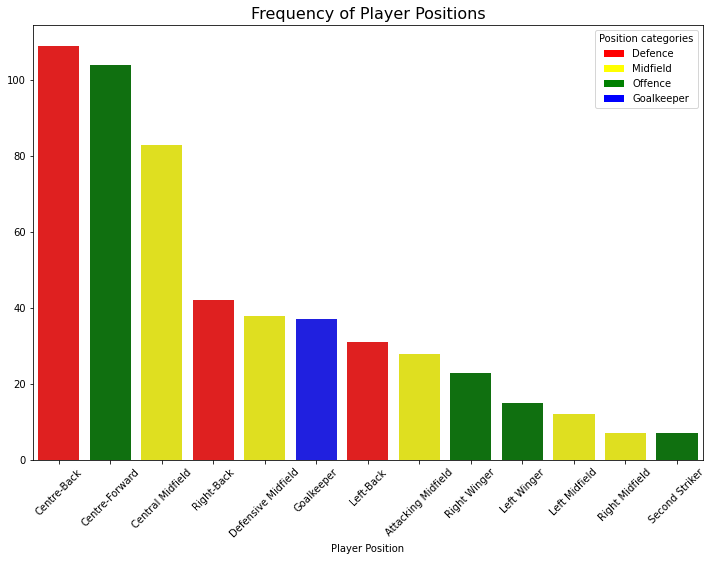

In [43]:
# Position group colors
def position_colors(position):
    if position in [ 'Centre-Back', "Right-Back", "Left-Back"]:
        return 'red'
    elif position in ['Central Midfield', 'Defensive Midfield', 'Attacking Midfield', 'Left Midfield', 'Right Midfield']:
        return 'yellow'
    elif position in [ 'Centre-Forward', 'Right Winger', "Left Winger", 'Second Striker']:
        return 'green'
    else:
        return 'blue'
    
colors = [position_colors(position) for position in position_count.index]

# Position legend
from matplotlib.patches import Patch
legend_elements = [Patch(facecolor='red', label = 'Defence'),
                   Patch(facecolor='yellow', label = 'Midfield'),
                   Patch(facecolor='green', label = 'Offence'),
                   Patch(facecolor='blue', label = 'Goalkeeper')]

plt.figure(figsize=(12,8))
sns.barplot(x=position_count.index, y=position_count.values, palette = colors)
plt.title('Frequency of Player Positions', fontsize=16)
plt.xlabel('Player Position')
plt.legend(handles=legend_elements, title='Position categories')
plt.xticks(rotation=45)
plt.show()

In [44]:
## Add a column for the position colors for plots
merged_df['position_color'] = merged_df['player_position'].apply(position_colors)

## I see some issues so here is an alternative
unique_positions = merged_df['player_position'].unique()
position_palette = {position: position_colors(position) for position in unique_positions}


Multivariate Analysis before Merging Variables

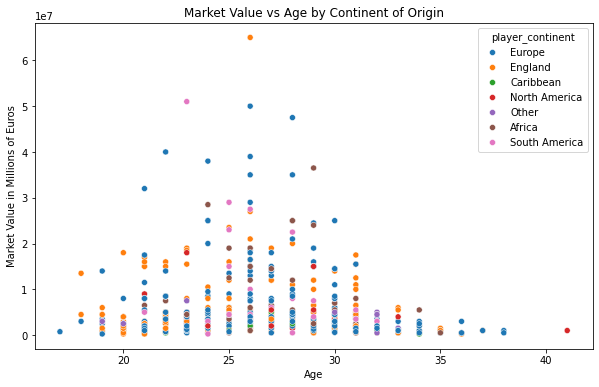

In [45]:
## Market Value Vs Age per Continent
plt.figure(figsize=(10,6))
sns.scatterplot(data=merged_df, x='age', y='player_market_value_euro', hue = 'player_continent')
plt.title('Market Value vs Age by Continent of Origin')
plt.xlabel('Age')
plt.ylabel('Market Value in Millions of Euros')
plt.show()

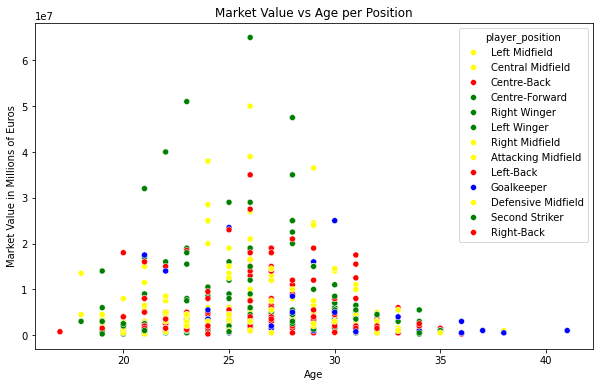

In [46]:
## Market Value Vs Age per Position
plt.figure(figsize=(10,6))
sns.scatterplot(data=merged_df, x='age', y='player_market_value_euro', hue = 'player_position',
                palette = position_palette)
plt.title('Market Value vs Age per Position')
plt.xlabel('Age')
plt.ylabel('Market Value in Millions of Euros')
plt.show()

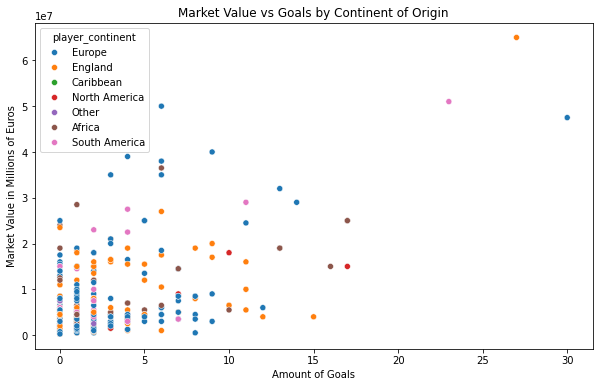

In [47]:
## Market Value vs Goals per Continent
plt.figure(figsize=(10,6))
sns.scatterplot(data=merged_df, x='Goals', y='player_market_value_euro', hue = 'player_continent')
plt.title('Market Value vs Goals by Continent of Origin')
plt.xlabel('Amount of Goals')
plt.ylabel('Market Value in Millions of Euros')
plt.show()

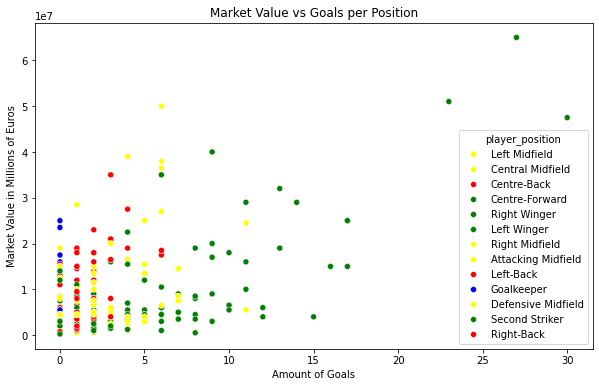

In [48]:
## Market Value vs Goals per Position
plt.figure(figsize=(10,6))
sns.scatterplot(data=merged_df, x='Goals', y='player_market_value_euro', hue = 'player_position',
                palette= position_palette)
plt.title('Market Value vs Goals per Position')
plt.xlabel('Amount of Goals')
plt.ylabel('Market Value in Millions of Euros')
plt.show()

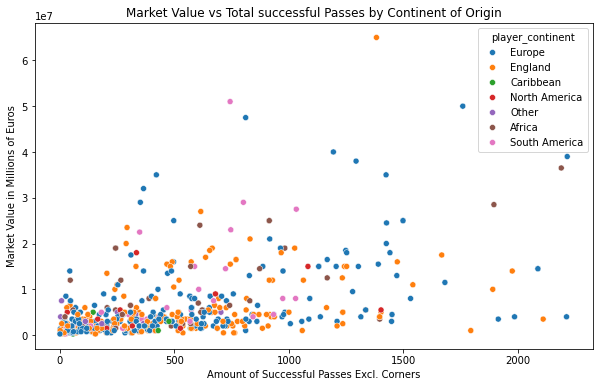

In [49]:
## Market value vs Passes per Continent 
plt.figure(figsize=(10,6))
sns.scatterplot(data=merged_df, x= 'Total Successful Passes Excl Crosses Corners', y='player_market_value_euro', hue = 'player_continent')
plt.title('Market Value vs Total successful Passes by Continent of Origin')
plt.xlabel('Amount of Successful Passes Excl. Corners')
plt.ylabel('Market Value in Millions of Euros')
plt.show()

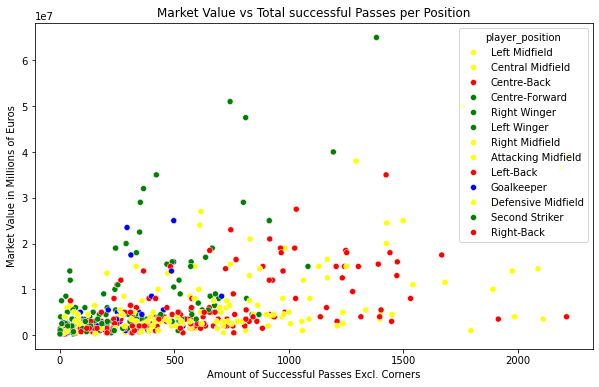

In [50]:
## Market value vs Passes per Position
plt.figure(figsize=(10,6))
sns.scatterplot(data=merged_df, x= 'Total Successful Passes Excl Crosses Corners', y='player_market_value_euro', hue = 'player_position',
                palette = position_palette)
plt.title('Market Value vs Total successful Passes per Position')
plt.xlabel('Amount of Successful Passes Excl. Corners')
plt.ylabel('Market Value in Millions of Euros')
plt.show()

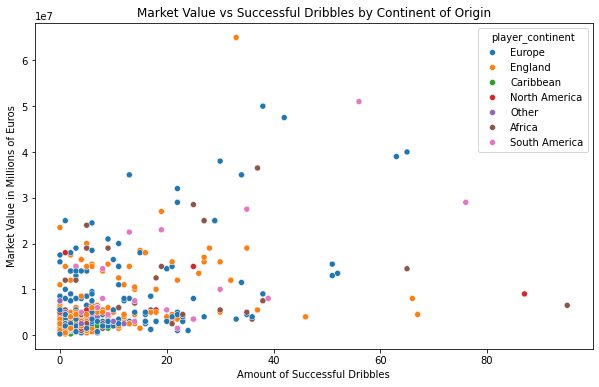

In [51]:
## Market Value vs Dribbles per Continent
plt.figure(figsize=(10,6))
sns.scatterplot(data=merged_df, x= 'Successful Dribbles', y='player_market_value_euro', hue = 'player_continent')
plt.title('Market Value vs Successful Dribbles by Continent of Origin')
plt.xlabel('Amount of Successful Dribbles')
plt.ylabel('Market Value in Millions of Euros')
plt.show()

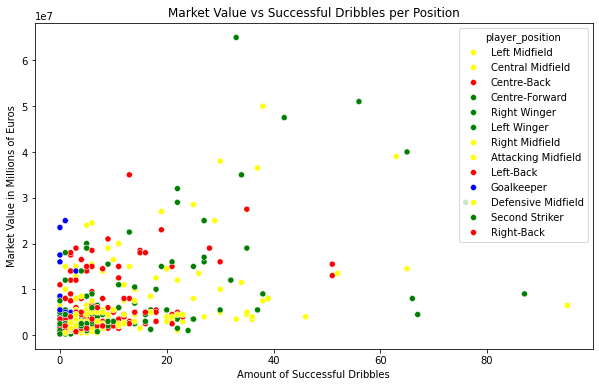

In [52]:
## Market Value vs Dribbles per Position
plt.figure(figsize=(10,6))
sns.scatterplot(data=merged_df, x= 'Successful Dribbles', y='player_market_value_euro', hue = 'player_position',
                palette = position_palette)
plt.title('Market Value vs Successful Dribbles per Position')
plt.xlabel('Amount of Successful Dribbles')
plt.ylabel('Market Value in Millions of Euros')
plt.show()

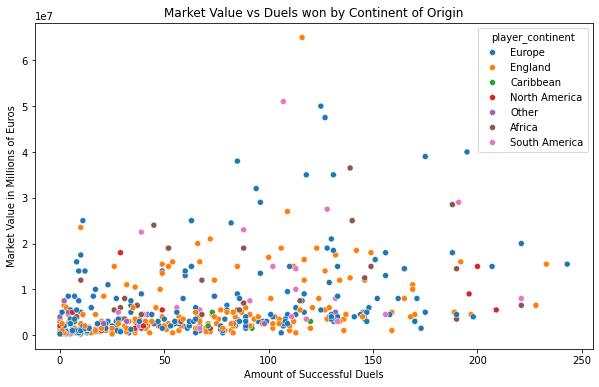

In [53]:
## Market Value vs Duels won per Continent
plt.figure(figsize=(10,6))
sns.scatterplot(data=merged_df, x= 'Duels won', y='player_market_value_euro', hue = 'player_continent')
plt.title('Market Value vs Duels won by Continent of Origin')
plt.xlabel('Amount of Successful Duels')
plt.ylabel('Market Value in Millions of Euros')
plt.show()

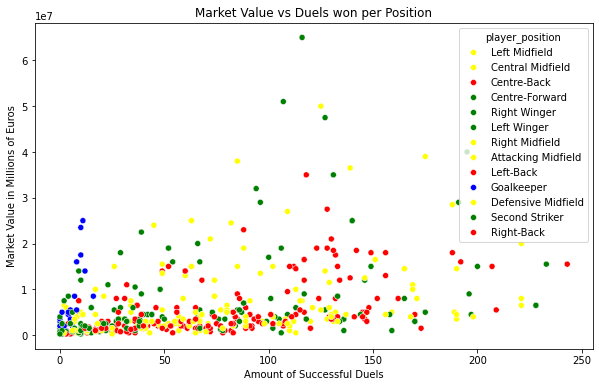

In [54]:
## Market Value vs Duels won per Position
plt.figure(figsize=(10,6))
sns.scatterplot(data=merged_df, x= 'Duels won', y='player_market_value_euro', hue = 'player_position',
                palette = position_palette)
plt.title('Market Value vs Duels won per Position')
plt.xlabel('Amount of Successful Duels')
plt.ylabel('Market Value in Millions of Euros')
plt.show()

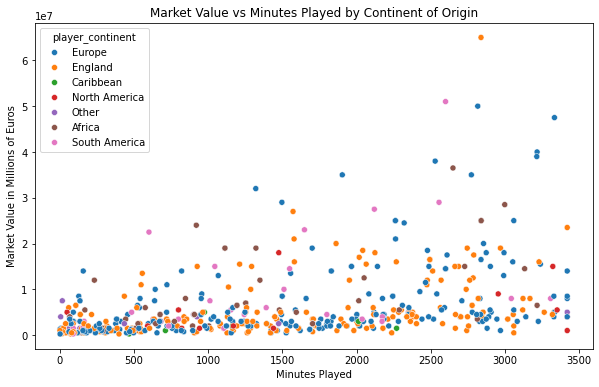

In [55]:
## Market Value vs Minutes Played per Continent
plt.figure(figsize=(10,6))
sns.scatterplot(data=merged_df, x= 'Time Played', y='player_market_value_euro', hue = 'player_continent')
plt.title('Market Value vs Minutes Played by Continent of Origin')
plt.xlabel('Minutes Played')
plt.ylabel('Market Value in Millions of Euros')
plt.show()

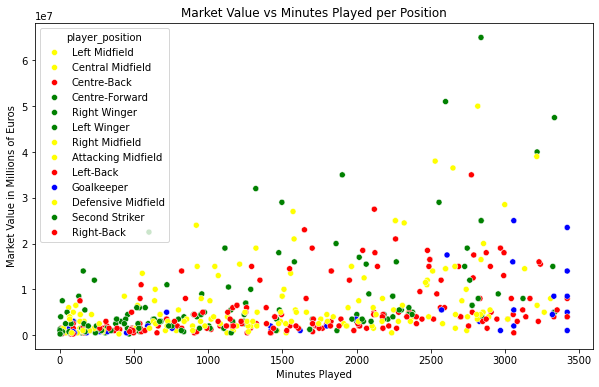

In [56]:
## Market Value vs Minutes Played per Position
plt.figure(figsize=(10,6))
sns.scatterplot(data=merged_df, x= 'Time Played', y='player_market_value_euro', hue = 'player_position',
                palette= position_palette)
plt.title('Market Value vs Minutes Played per Position')
plt.xlabel('Minutes Played')
plt.ylabel('Market Value in Millions of Euros')
plt.show()

Variables that are going to be used for modeling

In [57]:
model_columns = ['Goals', 'Shots on target excl goals', 'Shots Off Target inc woodwork',
                  'Total Successful Passes Excl Crosses Corners', 'Total Unsuccessful Passes Excl Crosses Corners',
                  'Key Passes', 'Assists', 'Key Set Pieces',
                   'Successful Dribbles', 'Unsuccessful Dribbles',
                    'Duels won', 'Duels lost', 'Tackles Won', 'Tackles Lost', 'Total Clearances', 'Recoveries', 'Interceptions',
                    'Total Fouls Won', 'Total Fouls Conceded',
                    'Goals Conceded', 'Saves Made',
                    'player_position', 'age', 'player_continent', 'player_height_mtrs',
                    'player_market_value_euro', 'player_name'
                    ]

In [58]:
df = merged_df[model_columns]

Categorical encoding

In [59]:
df = pd.get_dummies(df, columns=['player_position', 'player_continent'])

Heatmap

C:\Users\damon\AppData\Local\Temp\ipykernel_31652\3145691714.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation = df.corr()


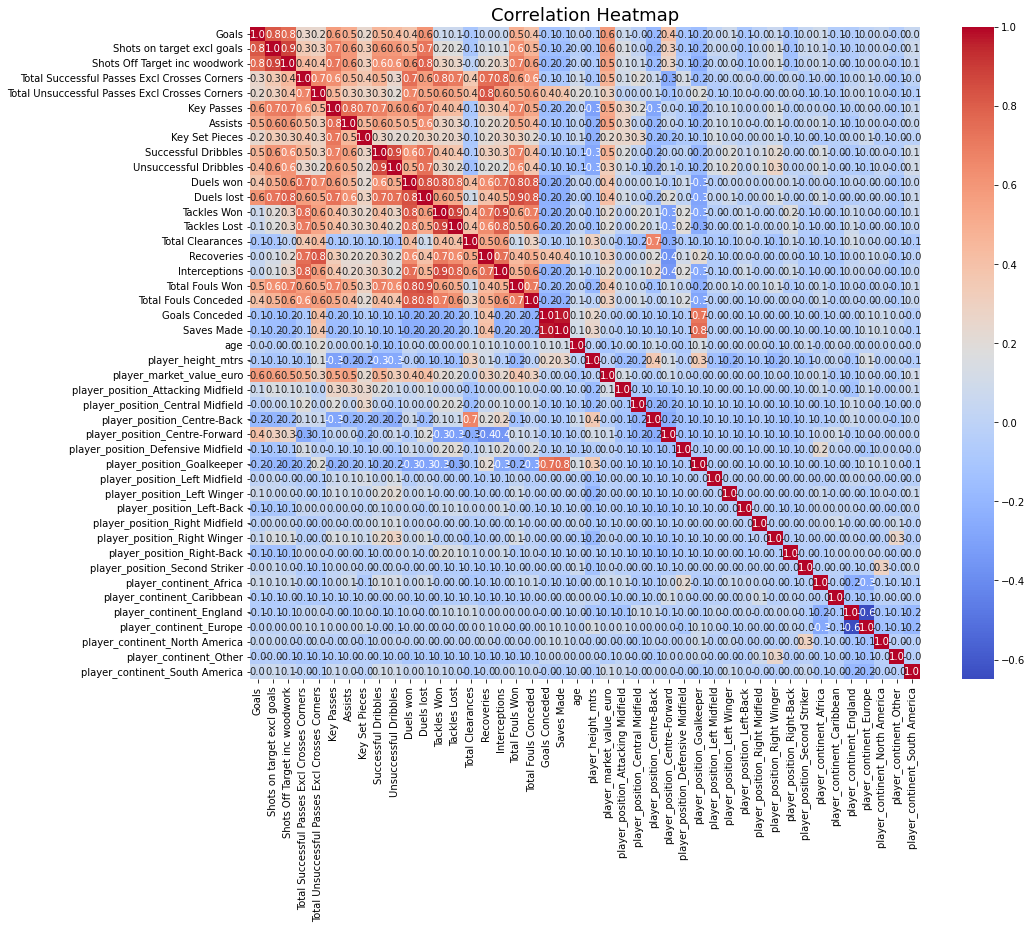

In [60]:
correlation = df.corr()

plt.figure(figsize=(15,12))
sns.heatmap(correlation, annot=True, fmt=".1f", cmap='coolwarm')
plt.title("Correlation Heatmap", fontsize=18)
plt.show()

Standardize Continuous data

Data gets standardized to ensure that each feature contributes equally to the model. The reason we do this before creating the composite variables is to make sure that every component contributes equally to the composite variable. We are linearly combining the features by adding them

In [61]:
from sklearn.preprocessing import StandardScaler

In [62]:
exclude_columns = ['index', 'player_market_value_euro', 'player_name',
                   'player_position_Attacking Midfield', 'player_position_Central Midfield',
                   'player_position_Centre-Back', 'player_position_Centre-Forward',
                   'player_position_Defensive Midfield', 'player_position_Goalkeeper',
                   'player_position_Left Midfield', 'player_position_Left Winger',
                   'player_position_Left-Back', 'player_position_Right Midfield', 'player_position_Right Winger',
                   'player_position_Right-Back', 'player_position_Second Striker',
                   'player_continent_Africa', 'player_continent_Asia', 'player_continent_Caribbean',
                   'player_continent_England', 'player_continent_Europe',
                   'player_continent_North America', 'player_continent_South America', 'player_continent_Other'
                   ]

numeric_columns = df.select_dtypes(include=['number']).columns.tolist()
columns_to_standardize = [col for col in numeric_columns if col not in exclude_columns]

scaler = StandardScaler()
df[columns_to_standardize] = scaler.fit_transform(df[columns_to_standardize])

In [63]:
df = df.drop('player_name', axis=1)

Log transform the target value

In [64]:
df['player_market_value_euro'] = np.log(df['player_market_value_euro'])

OLS Regression preparation

Make 2 versions. 1 with the positions, 1 without. We want to focus on English players + Strikers

OLS Regression V1: Without positions

In [65]:
## To avoid the dummy trap, we remove North America.
exclude_v1 = ['player_continent_North America', 'player_position_Attacking Midfield', 'player_position_Central Midfield',
                   'player_position_Centre-Back', 'player_position_Centre-Forward',
                   'player_position_Defensive Midfield', 'player_position_Goalkeeper',
                   'player_position_Left Midfield', 'player_position_Left Winger',
                   'player_position_Left-Back', 'player_position_Right Midfield', 'player_position_Right Winger',
                   'player_position_Right-Back', 'player_position_Second Striker']

X_v1 = df.drop(exclude_v1 + ['player_market_value_euro'], axis=1)
y_v1 = df['player_market_value_euro']
cv_folds = 5

In [66]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score



In [67]:
X_train_v1, X_test_v1, y_train_v1, y_test_v1 = train_test_split(X_v1, y_v1, test_size =0.2, random_state=42)

In [68]:
# Model fit; Train model
model_v1 = LinearRegression()
model_v1.fit(X_train_v1, y_train_v1)

LinearRegression()

Evaluation OLS Regression V1

In [69]:
y_pred_v1 = model_v1.predict(X_test_v1)

Transform the prediction back to normal in order to be able to analyze it

In [70]:
y_pred_v1 = np.exp(y_pred_v1)

In [71]:
mse_scores_v1 = cross_val_score(model_v1, X_v1, y_v1, cv=cv_folds, scoring='neg_mean_squared_error')

In [72]:
mse_scores_v1 = -mse_scores_v1
mean_mse_v1 = np.mean(mse_scores_v1)
std_mse_v1 = np.std(mse_scores_v1)
r2_v1 = r2_score(y_test_v1, y_pred_v1)

Feature Importance OLS Regression V1

In [73]:
coefficients_OLS_v1 = model_v1.coef_
feature_names_OLS_v1 = X_train_v1.columns

feature_importance_OLS_v1 = pd.DataFrame({
    'Feature': feature_names_OLS_v1,
    'Coefficient': coefficients_OLS_v1})

In [74]:
feature_importance_OLS_v1['abs_coefficient'] = feature_importance_OLS_v1['Coefficient'].abs()
feature_importance_sorted = feature_importance_OLS_v1.sort_values(by='abs_coefficient', ascending=True)

OLS V1 plots

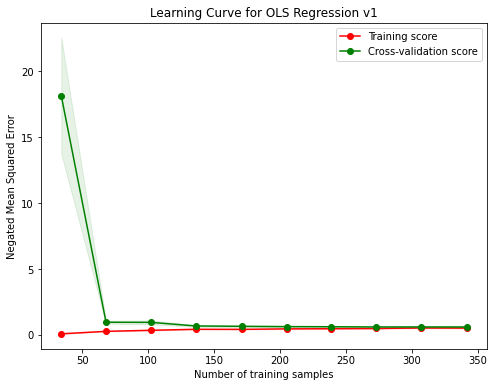

In [75]:
train_sizes, train_scores, validation_scores = learning_curve(
    estimator=LinearRegression(),
    X=X_train_v1,
    y=y_train_v1,
    train_sizes=np.linspace(0.1, 1.0, 10),
    cv=cv_folds,  
    scoring='neg_mean_squared_error'
)

# Negate mean and standard deviation for train and test scores
train_scores_mean = -np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
validation_scores_mean = -np.mean(validation_scores, axis=1)
validation_scores_std = np.std(validation_scores, axis=1)


plt.figure(figsize=(8, 6))
plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color="r")
plt.fill_between(train_sizes, validation_scores_mean - validation_scores_std, validation_scores_mean + validation_scores_std, alpha=0.1, color="g")
plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
plt.plot(train_sizes, validation_scores_mean, 'o-', color="g", label="Cross-validation score")
plt.title('Learning Curve for OLS Regression v1')
plt.xlabel('Number of training samples')
plt.ylabel('Negated Mean Squared Error')
plt.legend(loc='upper right')
plt.show()

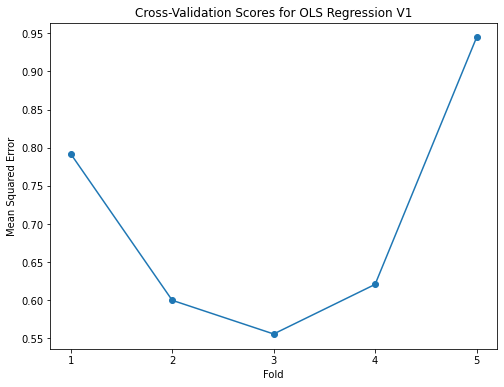

In [76]:
cv_scores = cross_val_score(model_v1, X_v1, y_v1, cv=5, scoring='neg_mean_squared_error')

# Convert to positive MSE scores
cv_scores = -cv_scores

# Plotting the cross-validation scores
plt.figure(figsize=(8, 6))
plt.plot(range(1, 6), cv_scores, marker='o')
plt.xlabel('Fold')
plt.ylabel('Mean Squared Error')
plt.title('Cross-Validation Scores for OLS Regression V1')
plt.xticks(range(1, 6))
plt.show()

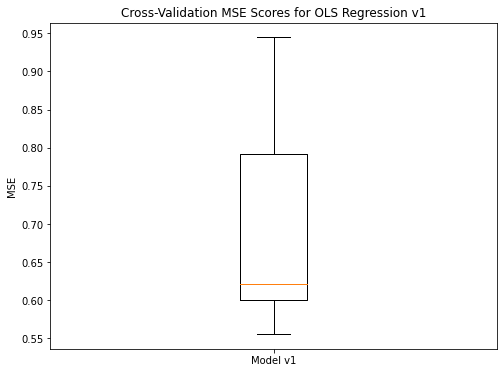

In [77]:
plt.figure(figsize=(8, 6))
plt.boxplot(mse_scores_v1)
plt.title("Cross-Validation MSE Scores for OLS Regression v1")
plt.ylabel("MSE")
plt.xticks([1], ['Model v1'])
plt.show()

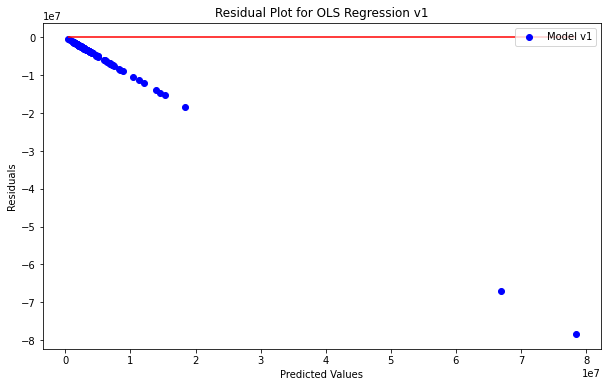

In [78]:
residuals_v1 = y_test_v1 - y_pred_v1

plt.figure(figsize=(10, 6))
plt.scatter(y_pred_v1, residuals_v1, color='blue', label='Model v1')
plt.hlines(y=0, xmin=y_pred_v1.min(), xmax=y_pred_v1.max(), colors='red')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot for OLS Regression v1')
plt.legend()
plt.show()

OLS Regression V2: with positions. Exclude North America and Defensive Midfield

In [79]:
exclude_v2 = ['player_continent_North America', 'player_position_Defensive Midfield']

X_v2 = df.drop(exclude_v2 + ['player_market_value_euro'], axis=1)
y_v2 = df['player_market_value_euro']

In [80]:
X_train_v2, X_test_v2, y_train_v2, y_test_v2 = train_test_split(X_v2, y_v2, test_size=0.2, random_state=42)

In [81]:
model_v2 = LinearRegression()
model_v2.fit(X_train_v2, y_train_v2)

LinearRegression()

In [82]:
y_pred_v2 = model_v2.predict(X_test_v2)


In [83]:
y_pred_v2 = np.exp(y_pred_v2)

In [84]:
mse_scores_v2 = cross_val_score(model_v2, X_v2, y_v2, cv=cv_folds, scoring='neg_mean_squared_error')

In [85]:
mse_scores_v2 = -mse_scores_v2
mean_mse_v2 = np.mean(mse_scores_v2)
std_mse_v2 = np.std(mse_scores_v2)
r2_v2 = r2_score(y_test_v2, y_pred_v2)

Feature Importance OLS V2

In [86]:
coefficients_OLS_v2 = model_v2.coef_
feature_names_OLS_v2 = X_train_v2.columns

feature_importance_OLS_v2 = pd.DataFrame({
    'Feature': feature_names_OLS_v2,
    'Coefficient': coefficients_OLS_v2})

In [87]:
feature_importance_OLS_v2['abs_coefficient'] = feature_importance_OLS_v2['Coefficient'].abs()
feature_importance_sorted = feature_importance_OLS_v2.sort_values(by='abs_coefficient', ascending=True)

OLS V2 plots

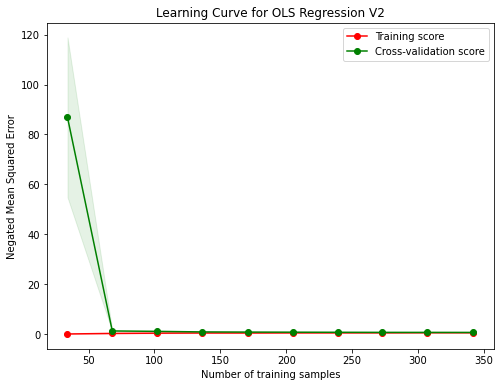

In [88]:
train_sizes, train_scores, validation_scores = learning_curve(
    estimator=LinearRegression(),
    X=X_train_v2,
    y=y_train_v2,
    train_sizes=np.linspace(0.1, 1.0, 10),
    cv=cv_folds,  
    scoring='neg_mean_squared_error'
)

# Negate mean and standard deviation for train and test scores
train_scores_mean = -np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
validation_scores_mean = -np.mean(validation_scores, axis=1)
validation_scores_std = np.std(validation_scores, axis=1)


plt.figure(figsize=(8, 6))
plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color="r")
plt.fill_between(train_sizes, validation_scores_mean - validation_scores_std, validation_scores_mean + validation_scores_std, alpha=0.1, color="g")
plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
plt.plot(train_sizes, validation_scores_mean, 'o-', color="g", label="Cross-validation score")
plt.title('Learning Curve for OLS Regression V2')
plt.xlabel('Number of training samples')
plt.ylabel('Negated Mean Squared Error')
plt.legend(loc='upper right')
plt.show()

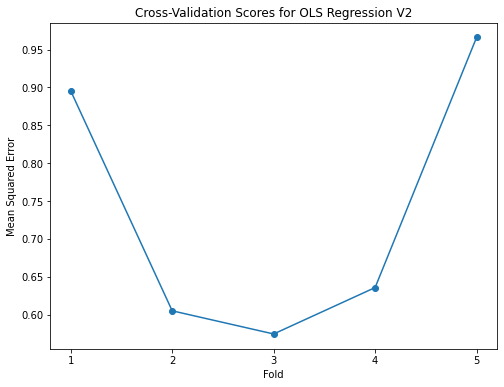

In [89]:
cv_scores = cross_val_score(model_v2, X_v2, y_v2, cv=5, scoring='neg_mean_squared_error')

# Convert to positive MSE scores
cv_scores = -cv_scores

# Plotting the cross-validation scores
plt.figure(figsize=(8, 6))
plt.plot(range(1, 6), cv_scores, marker='o')
plt.xlabel('Fold')
plt.ylabel('Mean Squared Error')
plt.title('Cross-Validation Scores for OLS Regression V2')
plt.xticks(range(1, 6))
plt.show()

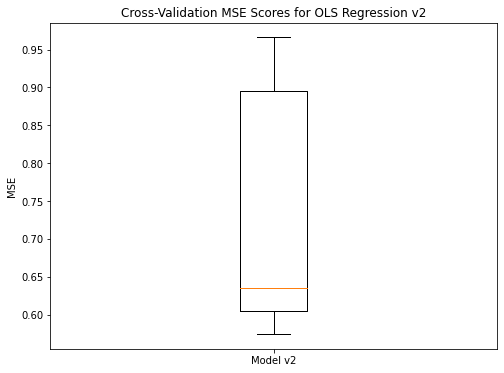

In [90]:
plt.figure(figsize=(8, 6))
plt.boxplot(mse_scores_v2)
plt.title("Cross-Validation MSE Scores for OLS Regression v2")
plt.ylabel("MSE")
plt.xticks([1], ['Model v2'])
plt.show()

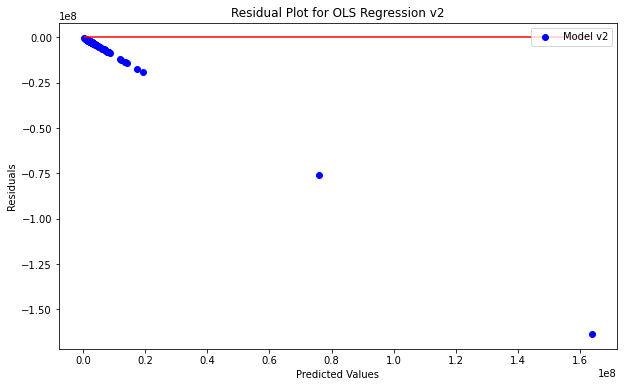

In [91]:
residuals_v2 = y_test_v2 - y_pred_v2

plt.figure(figsize=(10, 6))
plt.scatter(y_pred_v2, residuals_v2, color='blue', label='Model v2')
plt.hlines(y=1, xmin=y_pred_v2.min(), xmax=y_pred_v2.max(), colors='red')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot for OLS Regression v2')
plt.legend()
plt.show()

Lasso Regression preparation

In [92]:
from sklearn.linear_model import Lasso
from sklearn.linear_model import LassoCV

In order to find the optimal Alpha level, we conduct a gridsearch. After that we perform Lasso Regression with built in cross-validation

Lasso Regression V1

In [93]:
alphas = np.logspace(-4, 4, 100)

In [94]:
lasso_cv = LassoCV(alphas=alphas, cv=5, random_state=42)
lasso_cv.fit(X_train_v1, y_train_v1)
# Best alpha level
best_alpha = lasso_cv.alpha_

In [95]:
# Test
y_pred_v1_lasso = lasso_cv.predict(X_test_v1)
y_pred_v1_lasso = np.exp(y_pred_v1_lasso)
mse_v1_lasso = mean_squared_error(y_test_v1, y_pred_v1_lasso)
r2_v1_lasso = r2_score(y_test_v1, y_pred_v1_lasso)


The validation plot curve below shows the MSE for each alpha level

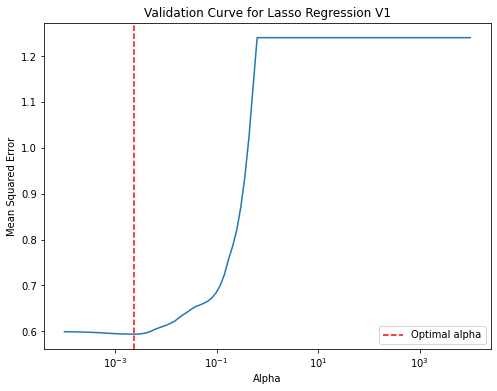

In [96]:
plt.figure(figsize=(8, 6))
plt.semilogx(lasso_cv.alphas_, np.mean(lasso_cv.mse_path_, axis=1))
plt.axvline(x=best_alpha, color='red', linestyle='--', label='Optimal alpha')
plt.xlabel('Alpha')
plt.ylabel('Mean Squared Error')
plt.title('Validation Curve for Lasso Regression V1')
plt.legend()
plt.show()

c:\Users\damon\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.341e-03, tolerance: 3.673e-03
  model = cd_fast.enet_coordinate_descent(
c:\Users\damon\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.341e-03, tolerance: 3.673e-03
  model = cd_fast.enet_coordinate_descent(
c:\Users\damon\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the sca

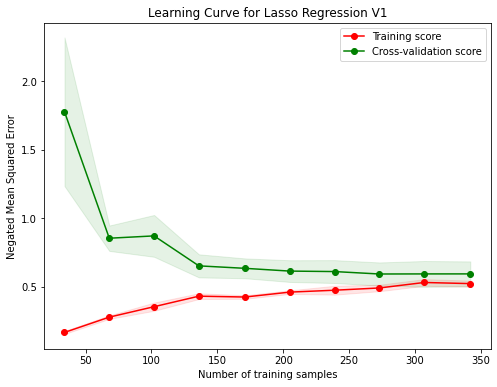

In [103]:

train_sizes, train_scores, validation_scores = learning_curve(
    estimator=Lasso(alpha=best_alpha),
    X=X_train_v1,
    y=y_train_v1,
    train_sizes=np.linspace(0.1, 1.0, 10),
    cv=5,
    scoring='neg_mean_squared_error'
)

# Negate the values to make them positive
train_scores_mean = -np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
validation_scores_mean = -np.mean(validation_scores, axis=1)
validation_scores_std = np.std(validation_scores, axis=1)

plt.figure(figsize=(8, 6))
plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
plt.plot(train_sizes, validation_scores_mean, 'o-', color="g", label="Cross-validation score")

# Fill the area between the standard deviations
plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color="r")
plt.fill_between(train_sizes, validation_scores_mean - validation_scores_std, validation_scores_mean + validation_scores_std, alpha=0.1, color="g")

plt.title("Learning Curve for Lasso Regression V1")
plt.xlabel("Number of training samples")
plt.ylabel("Negated Mean Squared Error")
plt.legend(loc="upper right")
plt.show()

Feature importance Lasso Regression V1

In [109]:
feature_names_lasso_v1 = X_train_v1.columns   
coefficients_lasso_v1 = lasso_cv.coef_
feature_importance_lasso_v1 = pd.DataFrame({'Feature': feature_names_lasso_v1, 'Coefficient': coefficients_lasso_v1})
feature_importance_lasso_v1['abs_coefficient'] = feature_importance_lasso_v1['Coefficient'].abs()
feature_importance = feature_importance_lasso_v1.sort_values(by='abs_coefficient', ascending=True)

Lasso Regression V2

In [99]:
lasso_cv_v2 = LassoCV(alphas=alphas, cv=5, random_state=42)
lasso_cv_v2.fit(X_train_v2, y_train_v2)
# Best alpha level
best_alpha_v2 = lasso_cv_v2.alpha_

In [101]:
y_pred_v2_lasso = lasso_cv_v2.predict(X_test_v2)
y_pred_v2_lasso = np.exp(y_pred_v2_lasso)
mse_v2_lasso = mean_squared_error(y_test_v2, y_pred_v2_lasso)
r2_v2_lasso = r2_score(y_test_v2, y_pred_v2_lasso)

Lasso V2 Plots

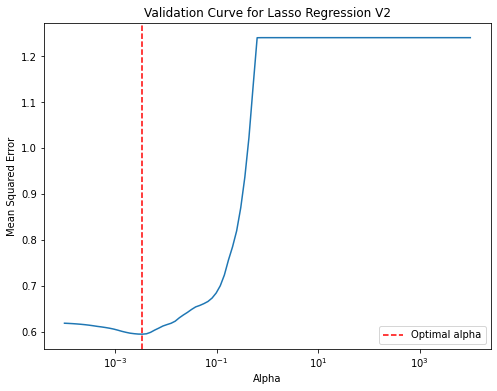

In [102]:
plt.figure(figsize=(8, 6))
plt.semilogx(lasso_cv_v2.alphas_, np.mean(lasso_cv_v2.mse_path_, axis=1))
plt.axvline(x=best_alpha_v2, color='red', linestyle='--', label='Optimal alpha')
plt.xlabel('Alpha')
plt.ylabel('Mean Squared Error')
plt.title('Validation Curve for Lasso Regression V2')
plt.legend()
plt.show()

c:\Users\damon\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.870e-02, tolerance: 4.349e-03
  model = cd_fast.enet_coordinate_descent(


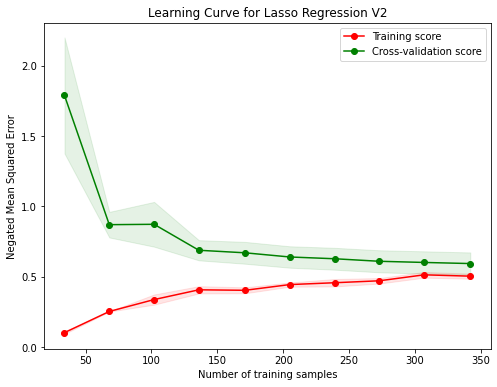

In [106]:
train_sizes, train_scores, validation_scores = learning_curve(
    estimator=Lasso(alpha=best_alpha_v2),
    X=X_train_v2,
    y=y_train_v2,
    train_sizes=np.linspace(0.1, 1.0, 10),
    cv=5,
    scoring='neg_mean_squared_error'
)

# Negate the values to make them positive
train_scores_mean = -np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
validation_scores_mean = -np.mean(validation_scores, axis=1)
validation_scores_std = np.std(validation_scores, axis=1)

plt.figure(figsize=(8, 6))
plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
plt.plot(train_sizes, validation_scores_mean, 'o-', color="g", label="Cross-validation score")

# Fill the area between the standard deviations
plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color="r")
plt.fill_between(train_sizes, validation_scores_mean - validation_scores_std, validation_scores_mean + validation_scores_std, alpha=0.1, color="g")

plt.title("Learning Curve for Lasso Regression V2")
plt.xlabel("Number of training samples")
plt.ylabel("Negated Mean Squared Error")
plt.legend(loc="upper right")
plt.show()

Feature Importance Lasso V2

In [108]:
feature_names_lasso_v2 = X_train_v2.columns   
coefficients_lasso_v2 = lasso_cv_v2.coef_
feature_importance_lasso_v2 = pd.DataFrame({'Feature': feature_names_lasso_v2, 'Coefficient': coefficients_lasso_v2})
feature_importance_lasso_v2['abs_coefficient'] = feature_importance_lasso_v2['Coefficient'].abs()
feature_importance_lasso_v2 = feature_importance_lasso_v2.sort_values(by='abs_coefficient', ascending=True)